# ❓ <u> Problem Statement (Simple Linear Regression) </u>

* Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

1) Delivery_time -> Predict delivery time using sorting time 

2) Salary_hike -> Build a prediction model for Salary_hike


# 1️⃣ <font color = 'green'><U> <b> MODEL FOR PREDICTING DELIVERY TIME </U> FOR Delivery_time DATA </b> 

* <font color = 'blue'> <u><b> IMPORT NECESSARY LIBRARIES </b></u>

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

* <font color = 'blue'><b><u> READ DATA </u></b>


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/SwatiVPatil/Data_sets/main/delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


* <font color = 'blue'><b><u> PERFORM EDA </u></b>

In [3]:
df.rename({'Delivery Time':'DT','Sorting Time':'ST'},axis=1, inplace=True)
df.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df.describe()

,DT,ST
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DT      21 non-null     float64
 1   ST      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
df.isna().sum()

DT    0
ST    0
dtype: int64

In [7]:
df.duplicated().sum()

0

* <font color = 'blue'><b><u> DATA VISUALISATION </u></b>

+ Storting time is independent variable[x-axis] and Delivery time is dependent variable[y-axis]

<AxesSubplot:xlabel='ST', ylabel='DT'>

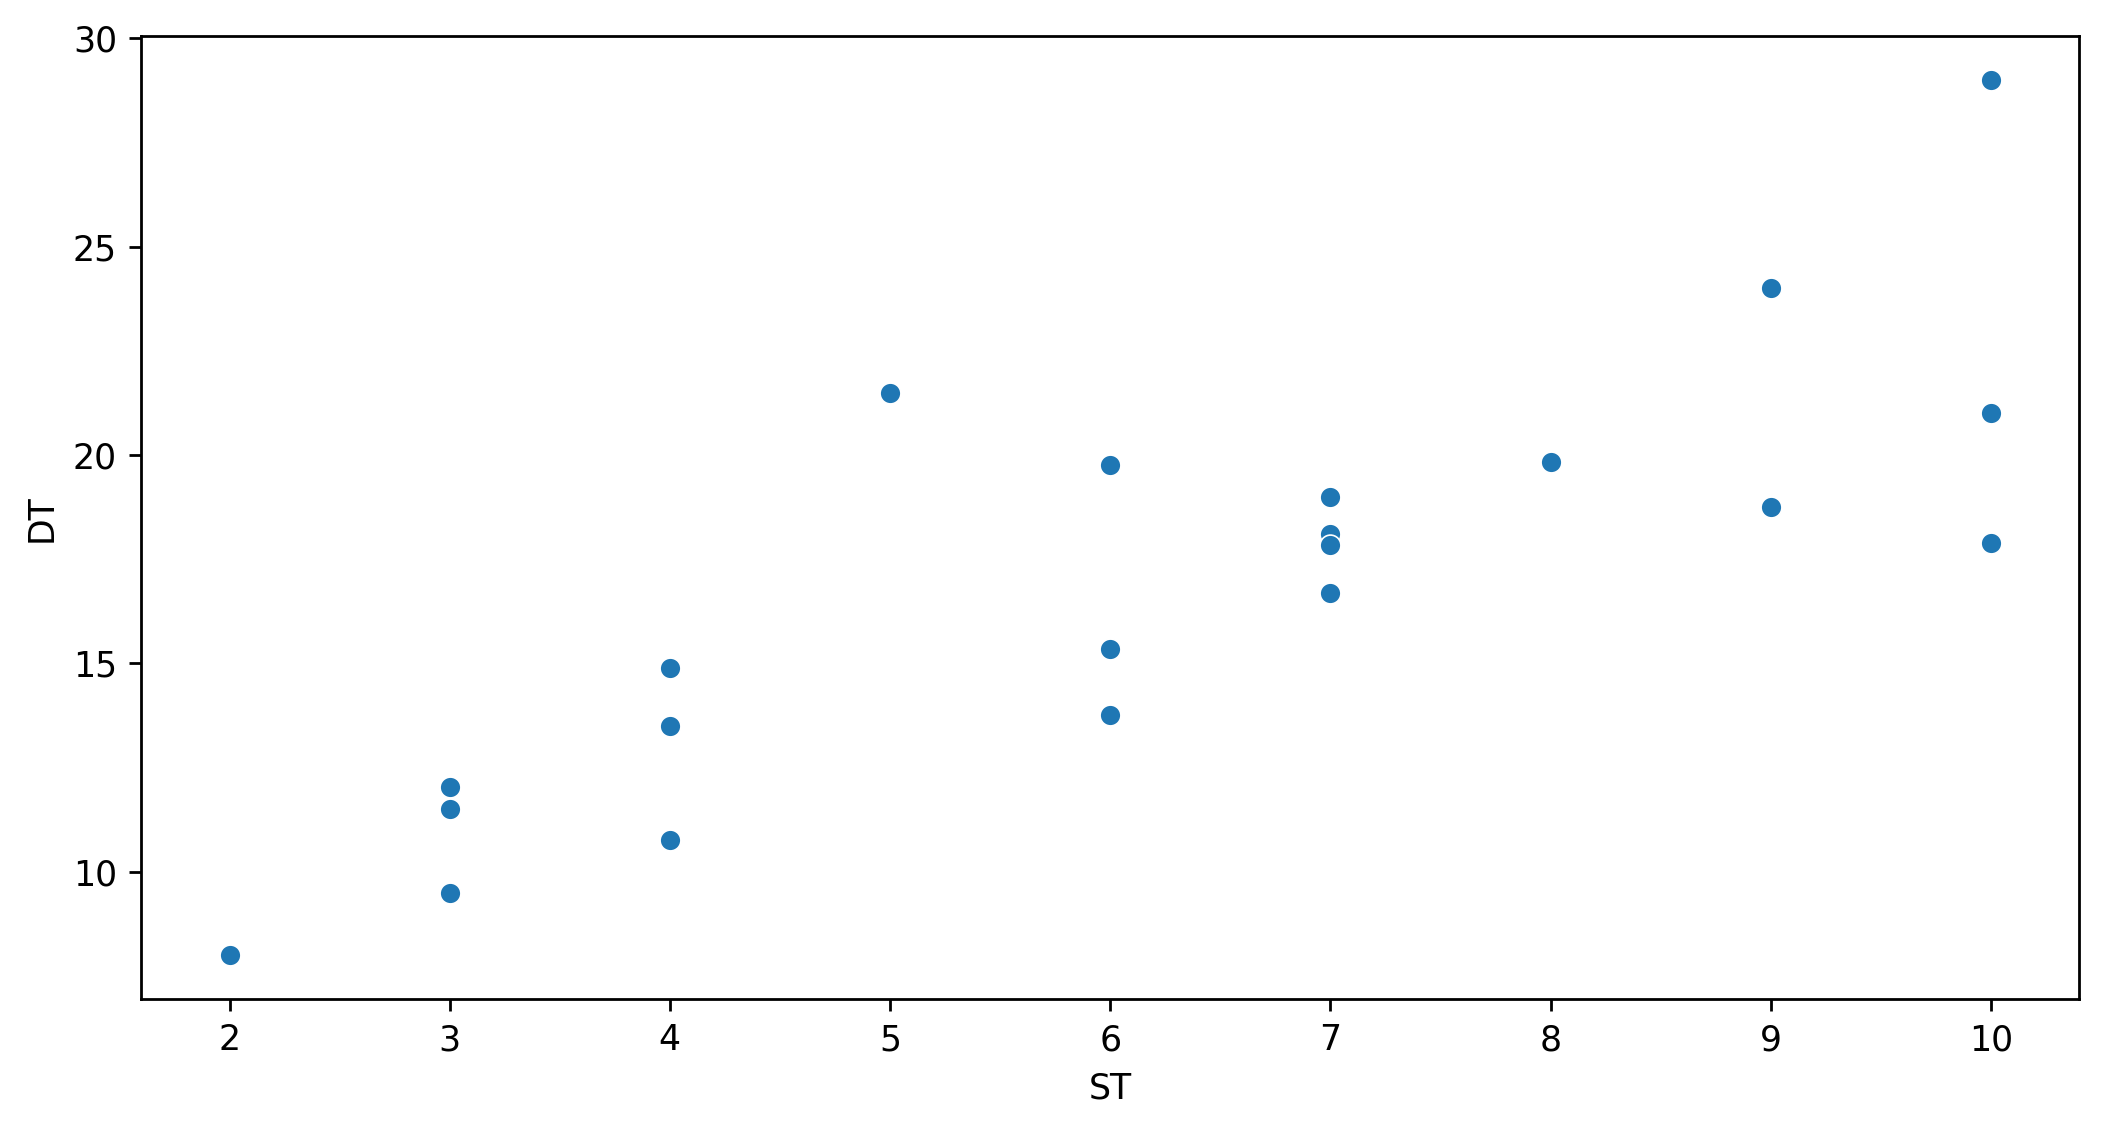

In [8]:
sns.scatterplot(df['ST'],df['DT'])

<AxesSubplot:xlabel='ST', ylabel='Density'>

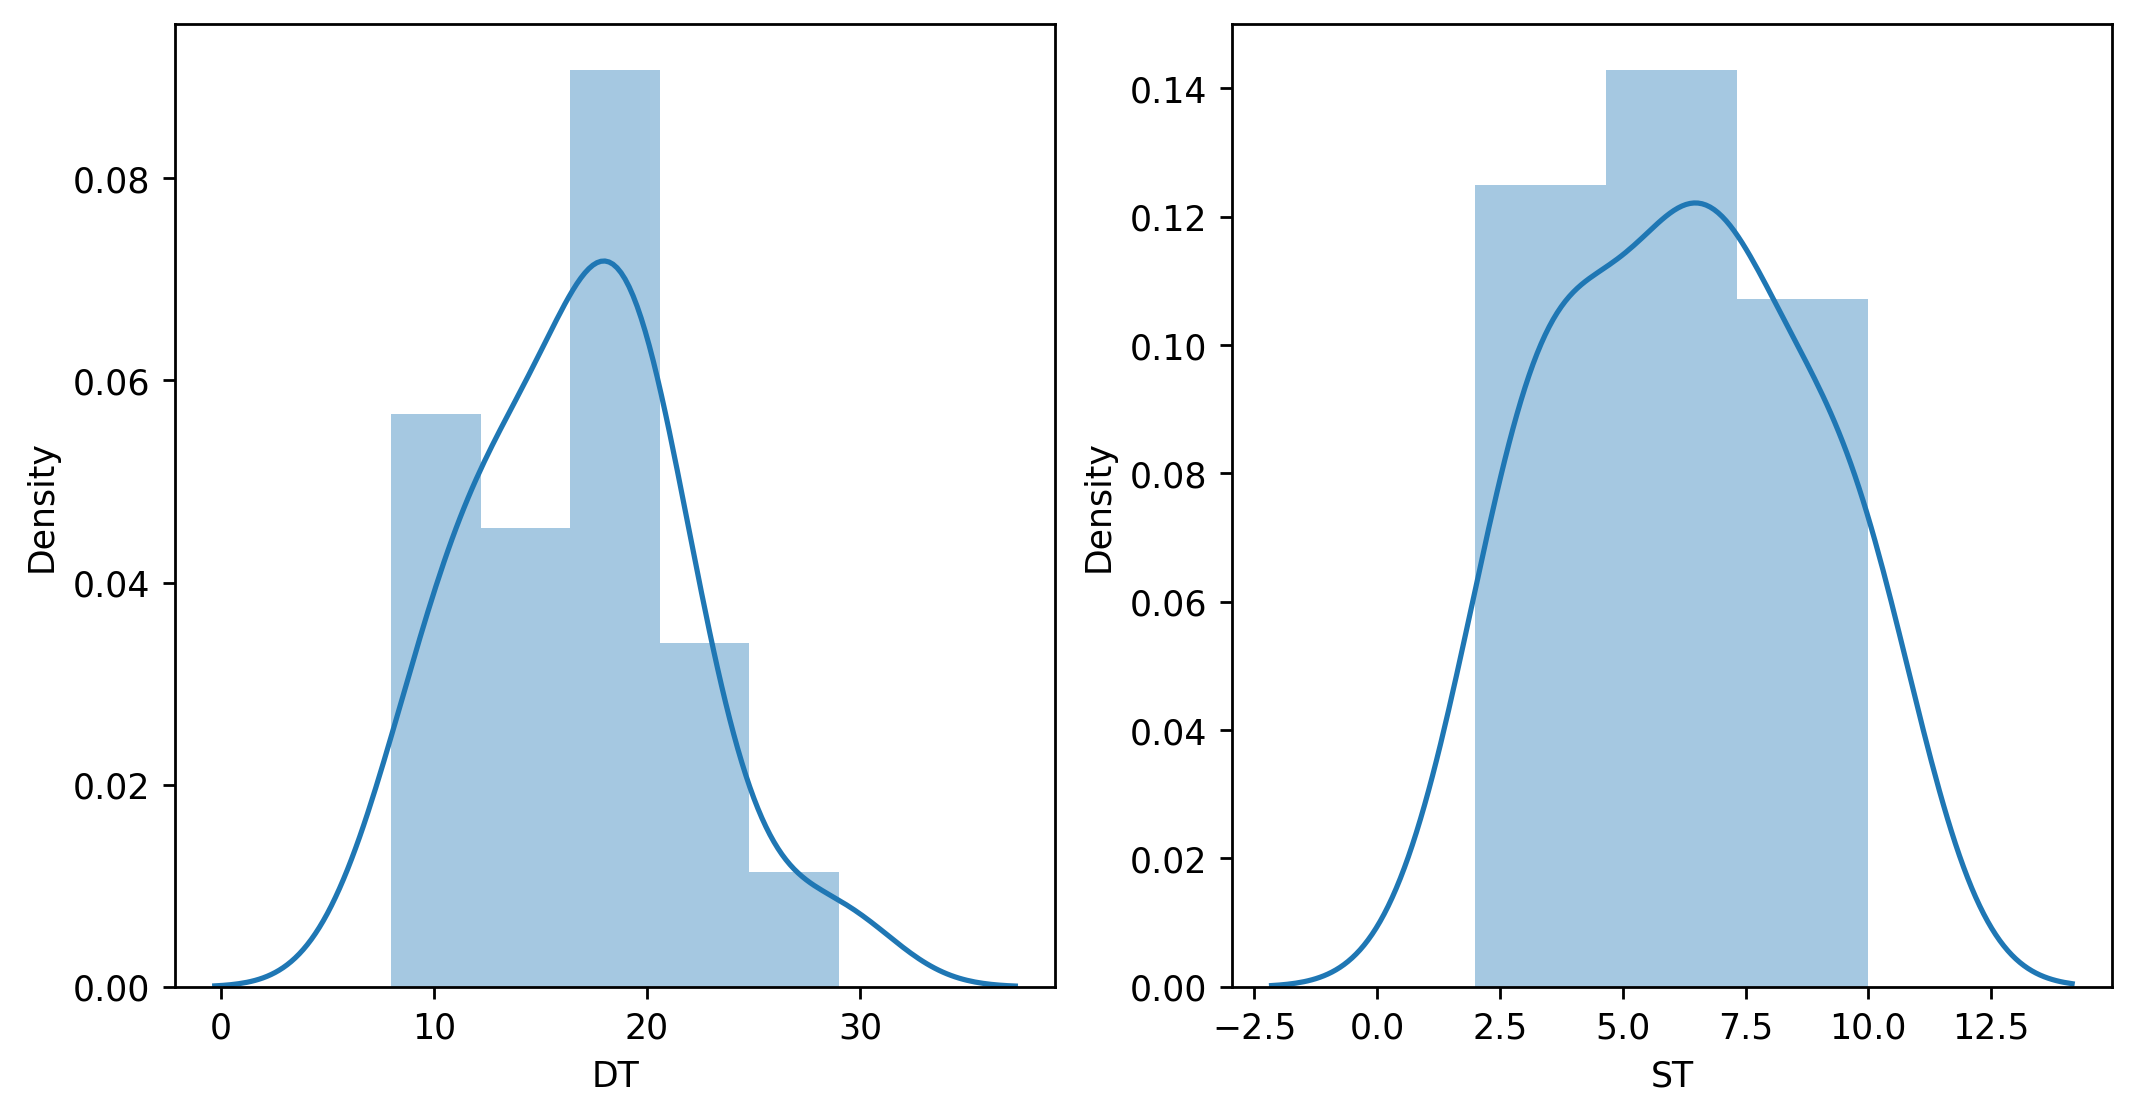

In [9]:
plt.subplot(1,2,1)
sns.distplot(df["DT"])
plt.subplot(1,2,2)
sns.distplot(df["ST"])

* <font color = 'blue'><b><U> CORRELATION ANALYSIS </U></b>

<AxesSubplot:>

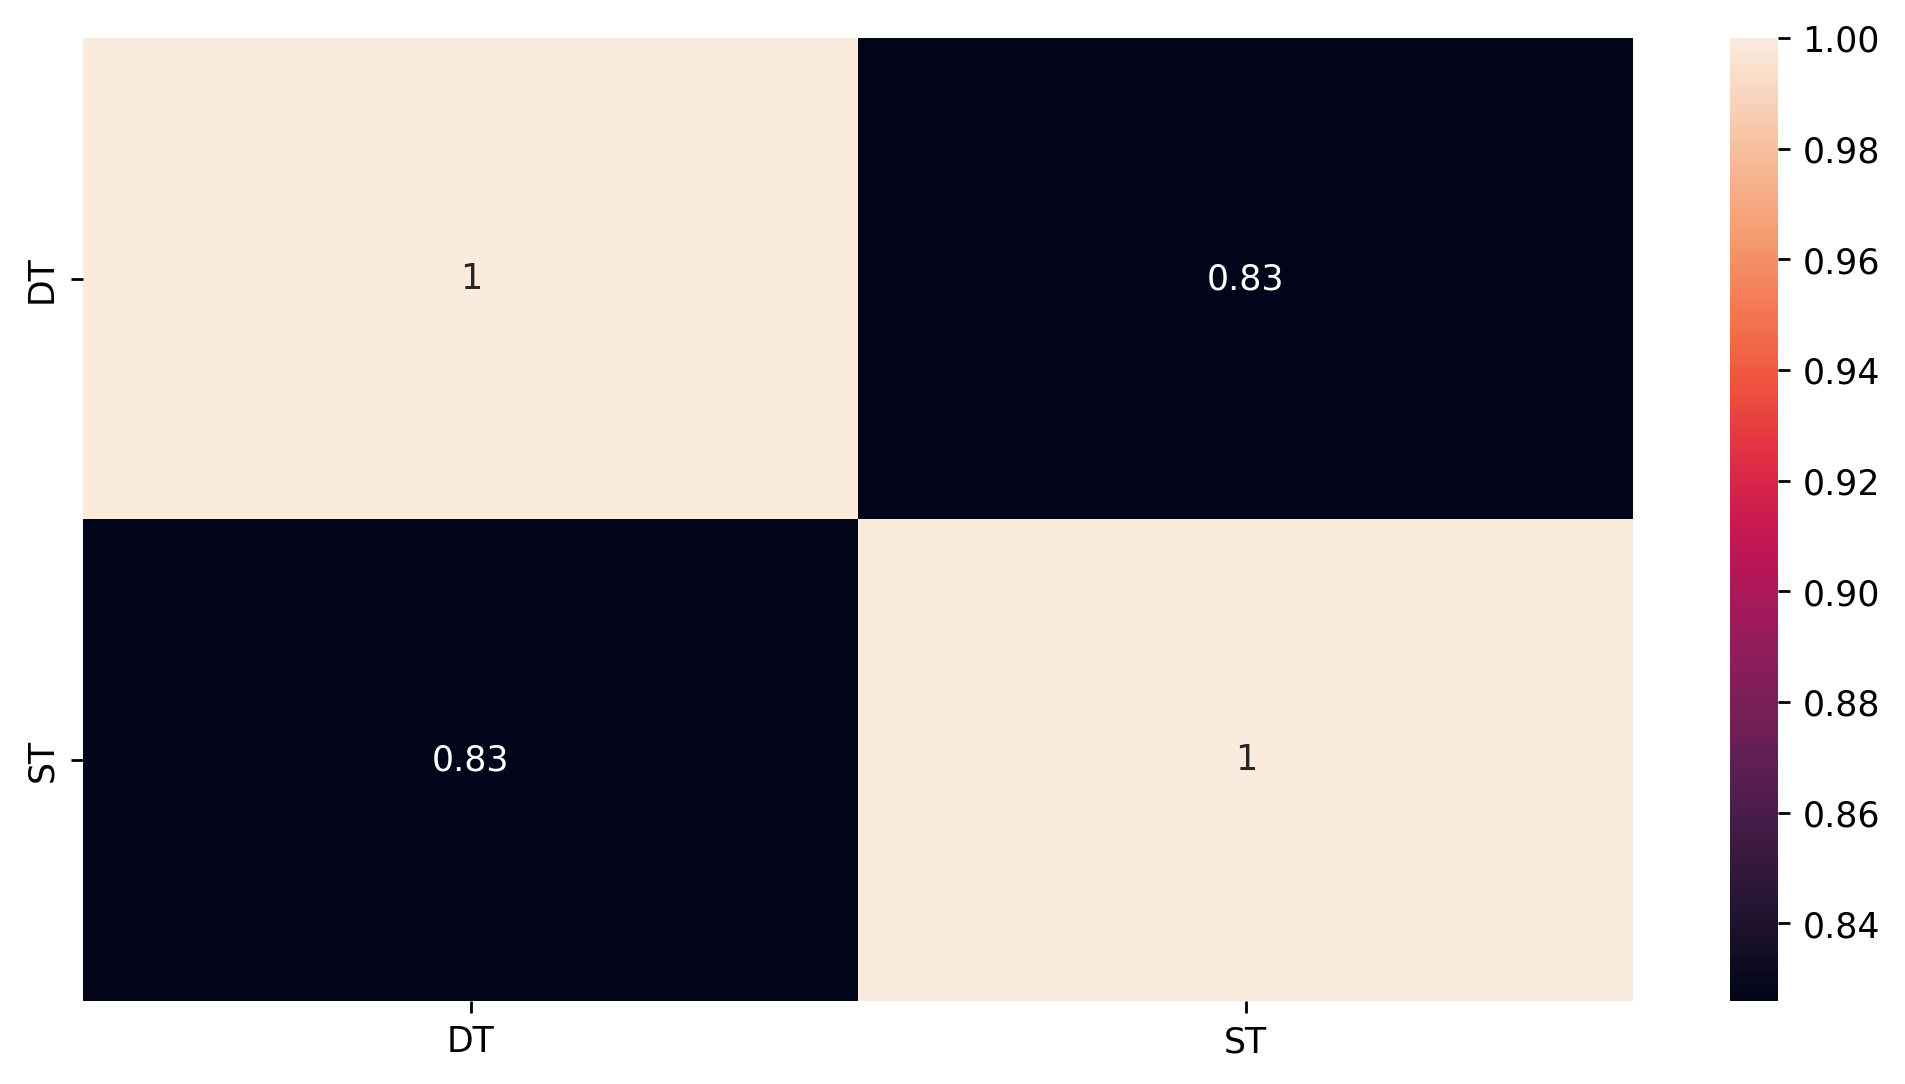

In [10]:
sns.heatmap(df.corr(), annot=True)

> #### Correlation = 0.83 shows Delivery Time and Sorting Time are highly correlated variables

* <font color = 'blue'><b><u> MODEL BUILDING </U></b>

#### Fitting Linear Regression Model 

In [11]:
# Import statsmodels 

In [12]:
import statsmodels.formula.api as smf

In [13]:
model_DT = smf.ols('DT~ST', data = df).fit()

In [14]:
model_DT.params

Intercept    6.582734
ST           1.649020
dtype: float64

> #### We got Intercept value(C)=6.5 and slope value(m)=1.6 for best fit line y = mx + c. 

* <font color = 'blue'> <b><u> MODEL VALIDATION </U></b>

In [15]:
# r2 value
model_DT.rsquared

0.6822714748417231

> #### As we get low accuracy lets try to perform model with log transformation.

* <font color = 'blue'> <u><b> MODEL WITH LOG TRANSFORMATION </b></U>

In [16]:
log_DT = np.log(df['DT'])
log_ST = np.log(df['ST'])


In [17]:
model_DT_log = smf.ols('log_DT~log_ST', data=df).fit()

In [18]:
model_DT_log.params

Intercept    1.741987
log_ST       0.597522
dtype: float64

In [19]:
# r2 value
model_DT_log.rsquared

0.77216134926874

> #### By log transformation accuracy is increased by 9% but its not much good. So let's try to perform Model with Squareroot Transformation.

* <font color = 'blue'> <u><b> MODEL WITH SQUAREROOT TRANSFORMATION </b></U>

In [20]:
sq_DT = np.sqrt(df['DT'])
sq_ST = np.sqrt(df['ST'])

In [21]:
model_DT_sq = smf.ols('sq_DT~sq_ST', data=df).fit()

In [22]:
model_DT_sq.params

Intercept    1.613479
sq_ST        1.002217
dtype: float64

In [23]:
# r2 value
model_DT_sq.rsquared

0.7292011987544664

> #### As we accuracy get decreased by 5% than Log Transformation it can be said that Log Transformation Perform Better than Squareroot Transformation. 

* <font color = 'blue'> <u><b> PREDICTING DELIVERY TIME WITH LOG TRANSFORMATION </b></U>

In [24]:
newdf = pd.DataFrame({
    'New_ST' : [5,9,6,12,3,15,7],
    'log_ST' : np.log([5,9,6,12,3,15,7])
})
newdf

,New_ST,log_ST
0,5,1.609438
1,9,2.197225
2,6,1.791759
3,12,2.484907
4,3,1.098612
5,15,2.708050
6,7,1.945910


In [25]:
model_DT_log.predict(newdf)

0    2.703662
1    3.054878
2    2.812603
3    3.226774
4    2.398432
5    3.360108
6    2.904712
dtype: float64

In [26]:
newdf['Predicted_DT'] = np.exp(model_DT_log.predict(newdf))
newdf

,New_ST,log_ST,Predicted_DT
0,5,1.609438,14.934324
1,9,2.197225,21.218593
2,6,1.791759,16.653216
3,12,2.484907,25.198244
4,3,1.098612,11.005911
5,15,2.708050,28.792287
6,7,1.945910,18.259981


> #### Let's Visualise the New Predicted Data 

<AxesSubplot:xlabel='New_ST', ylabel='Predicted_DT'>

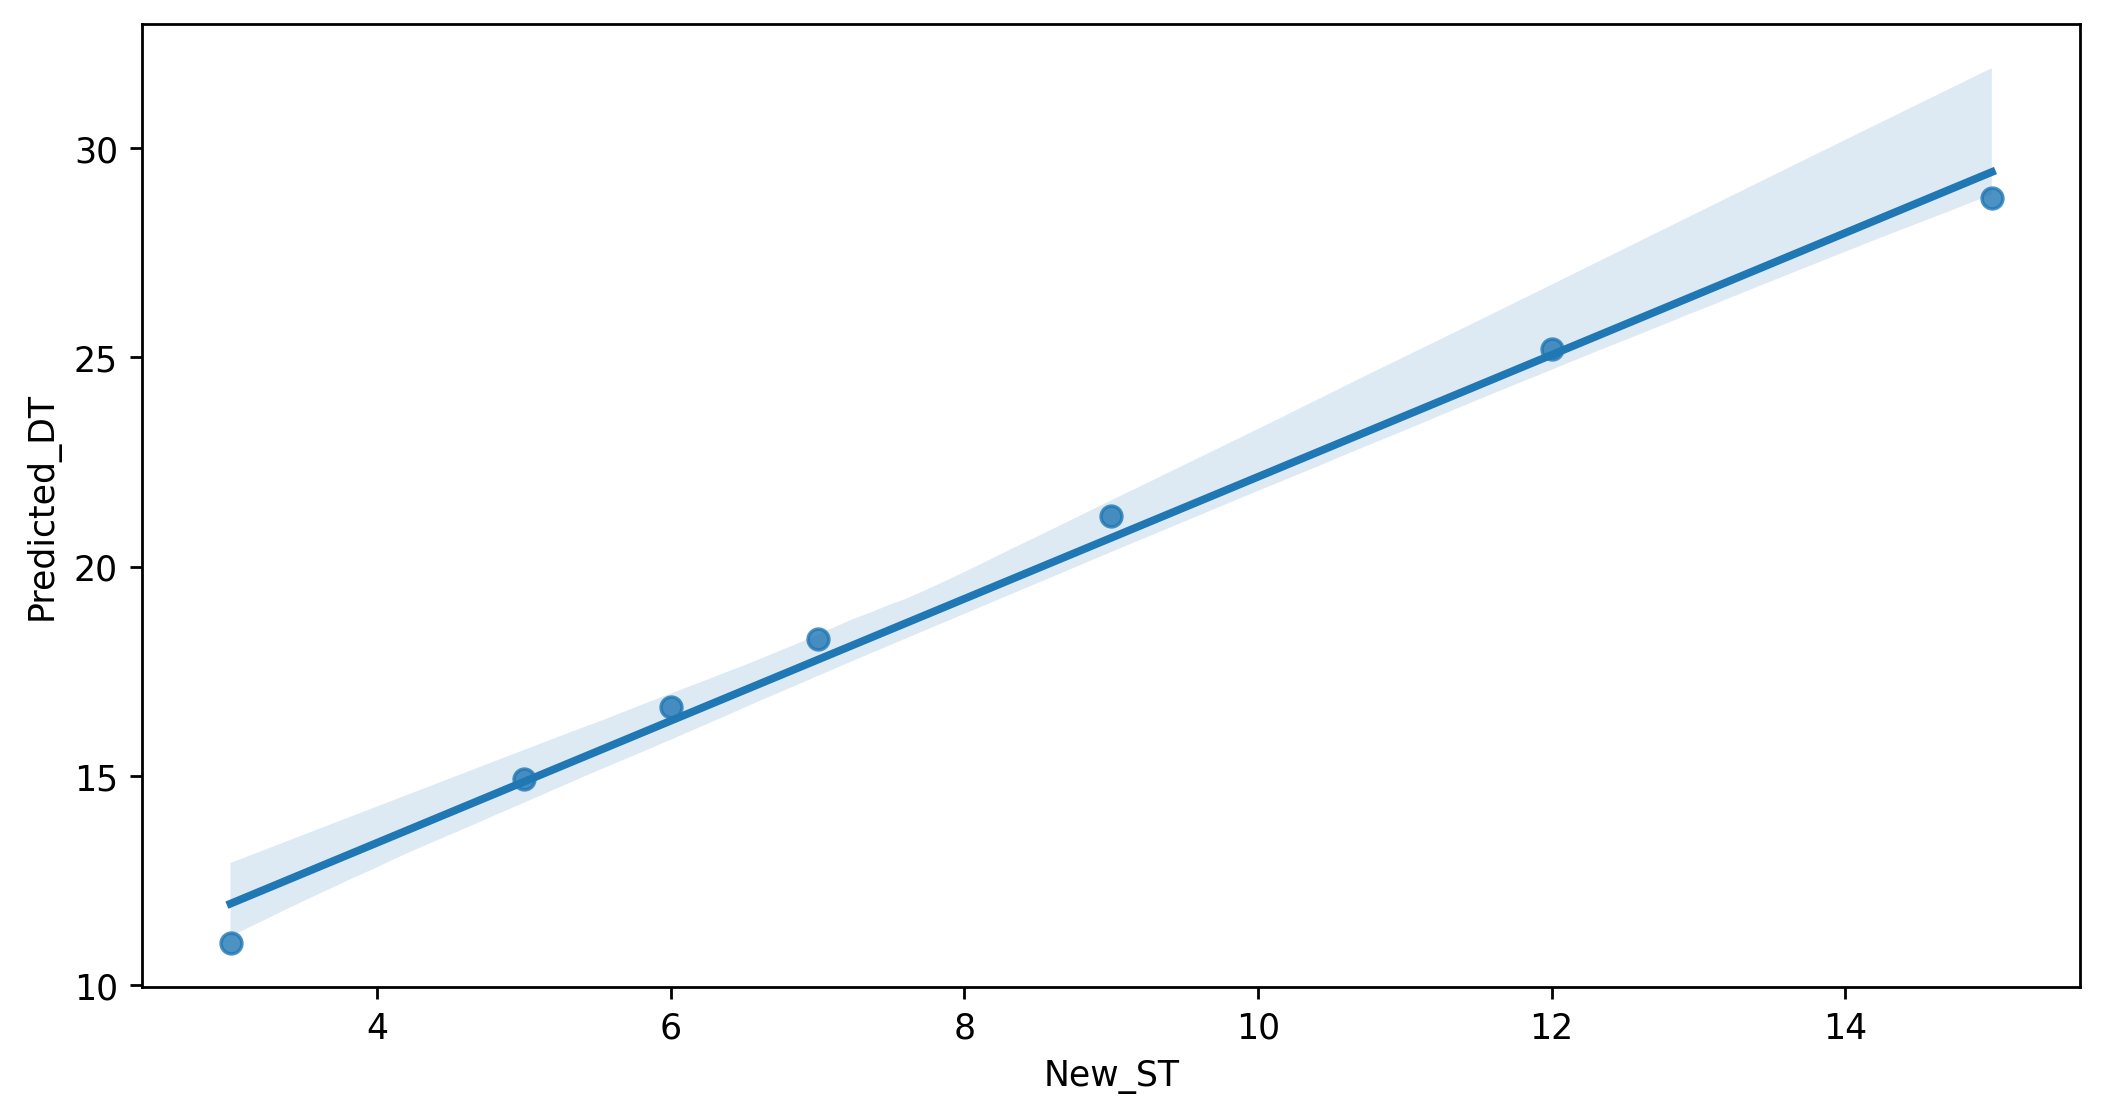

In [27]:
sns.regplot('New_ST', 'Predicted_DT', data=newdf)

<br><br><br>

***

# 2️⃣ <font color = 'Green'><U> <b> MODEL FOR PREDICTING SALARY HIKE </U> FOR Salary_hike DATA </b> 

*  <font color = 'blue'><b><u> READ DATA </u></b>

In [28]:
df_Sal = pd.read_csv('https://raw.githubusercontent.com/SwatiVPatil/Data_sets/main/Salary_Data.csv') 
df_Sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


* <font color = 'blue'><b><u> PERFORM EDA </u></b>


In [29]:
df_Sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [30]:
df_Sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [31]:
df_Sal.duplicated().sum()

0

In [32]:
df_Sal.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

* <font color = 'blue'><b><u> DATA VISUALISATION </u></b>


* Here, YearsExperience is independent variable [x-axis] on which salary is dependent [y-axis]

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

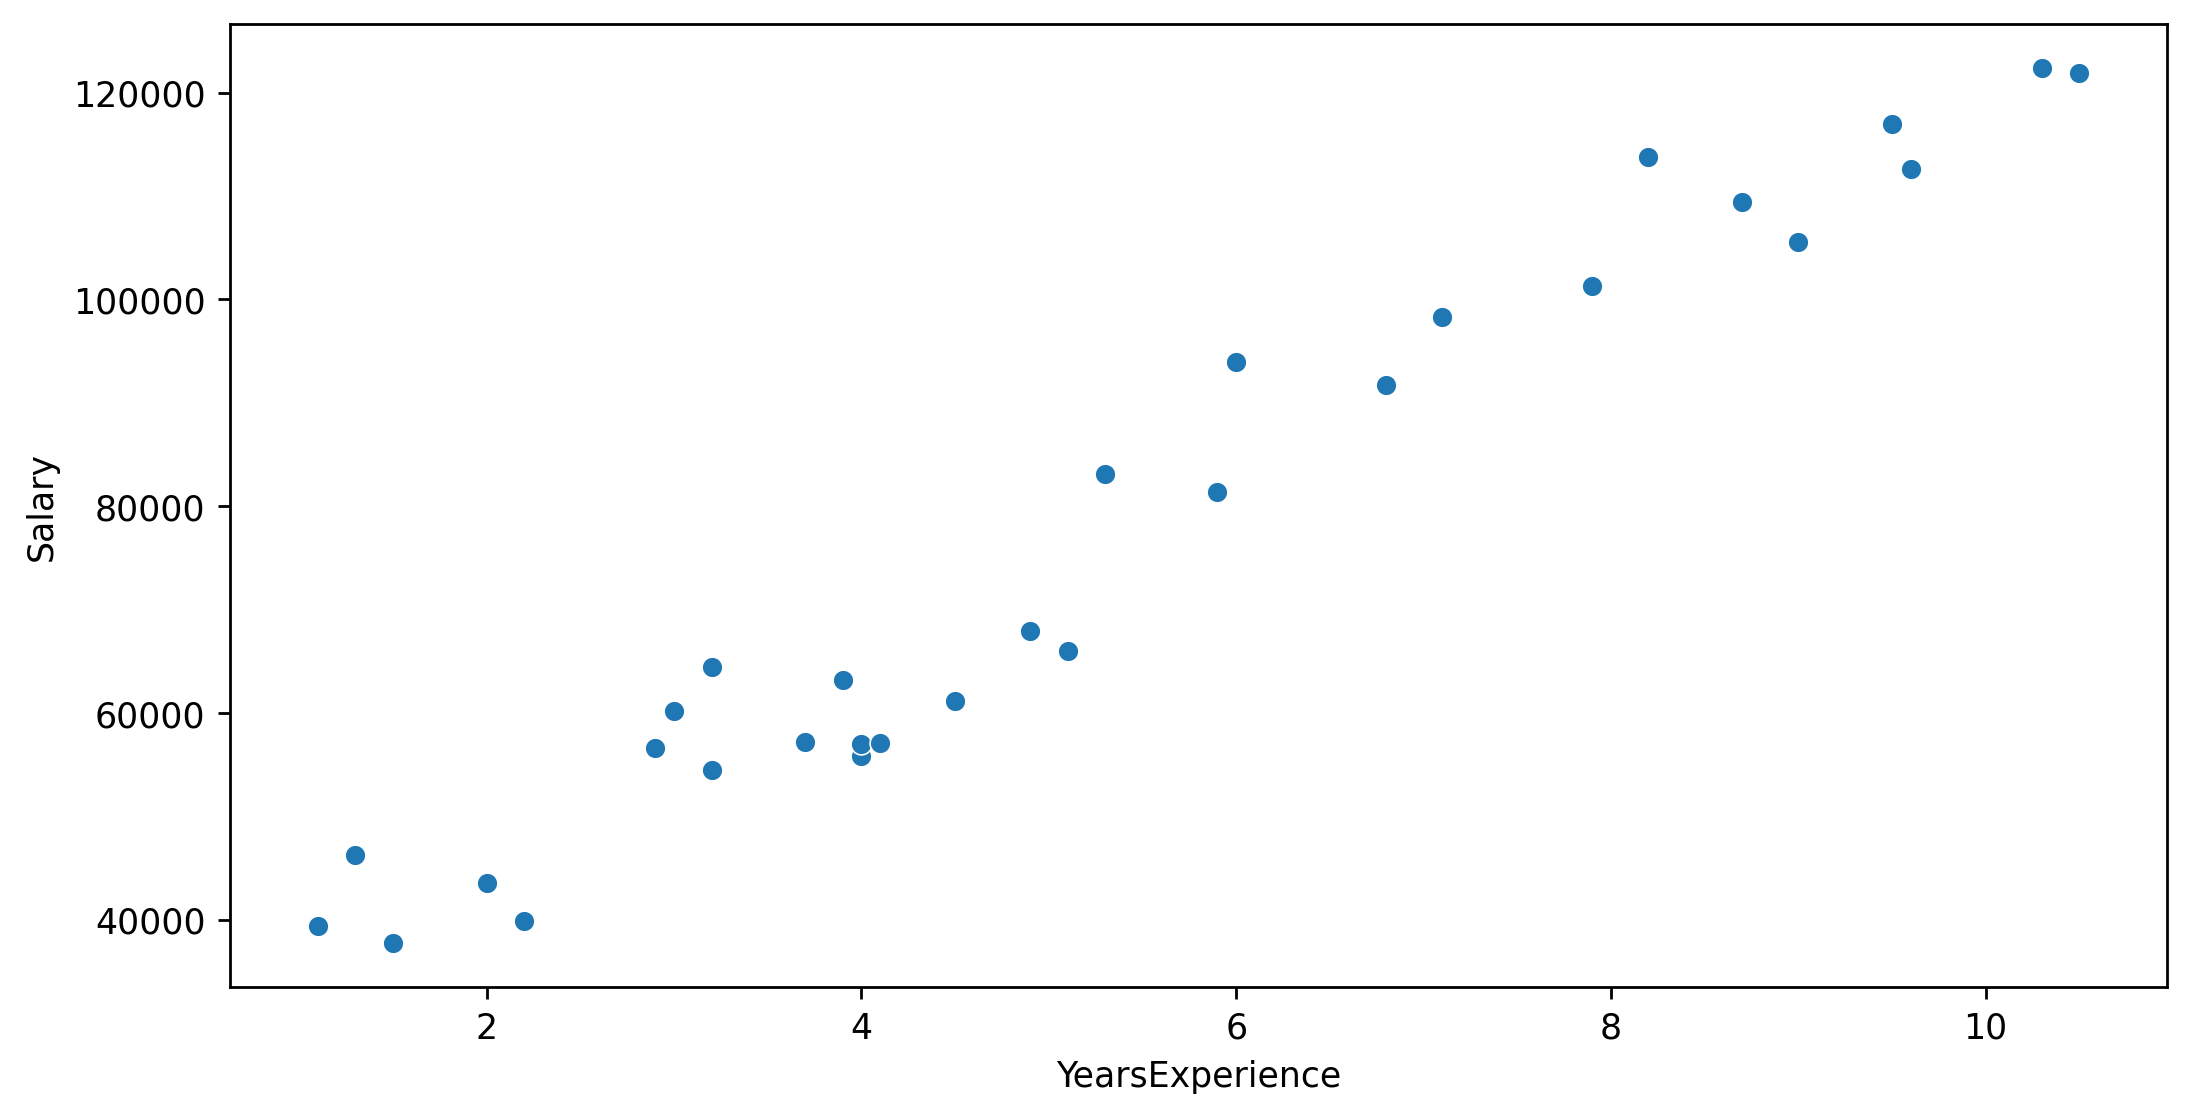

In [33]:
sns.scatterplot(df_Sal['YearsExperience'], df_Sal['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

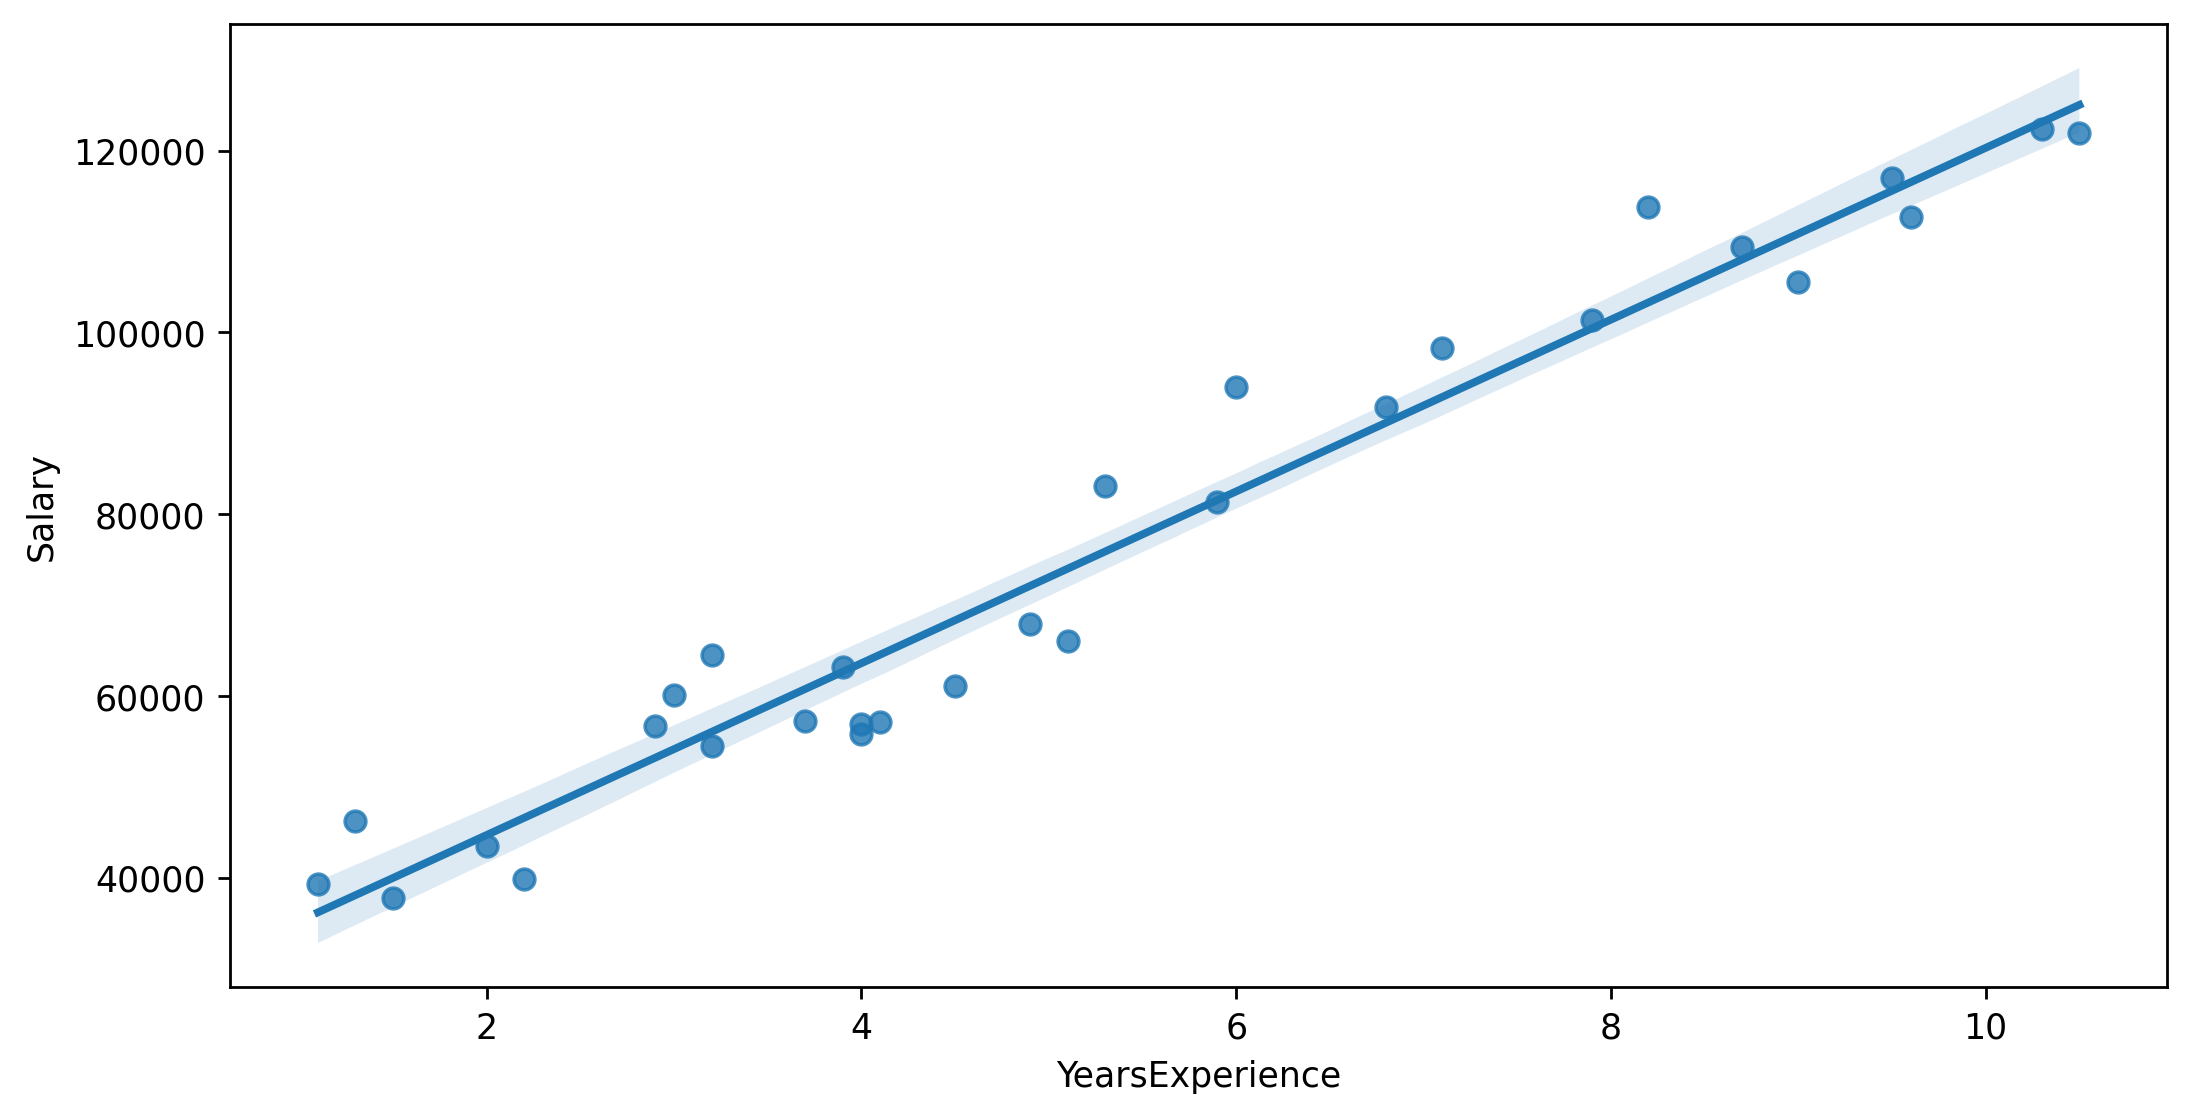

In [34]:
sns.regplot('YearsExperience', 'Salary', data=df_Sal)

Text(0.5, 1.0, 'Salary')

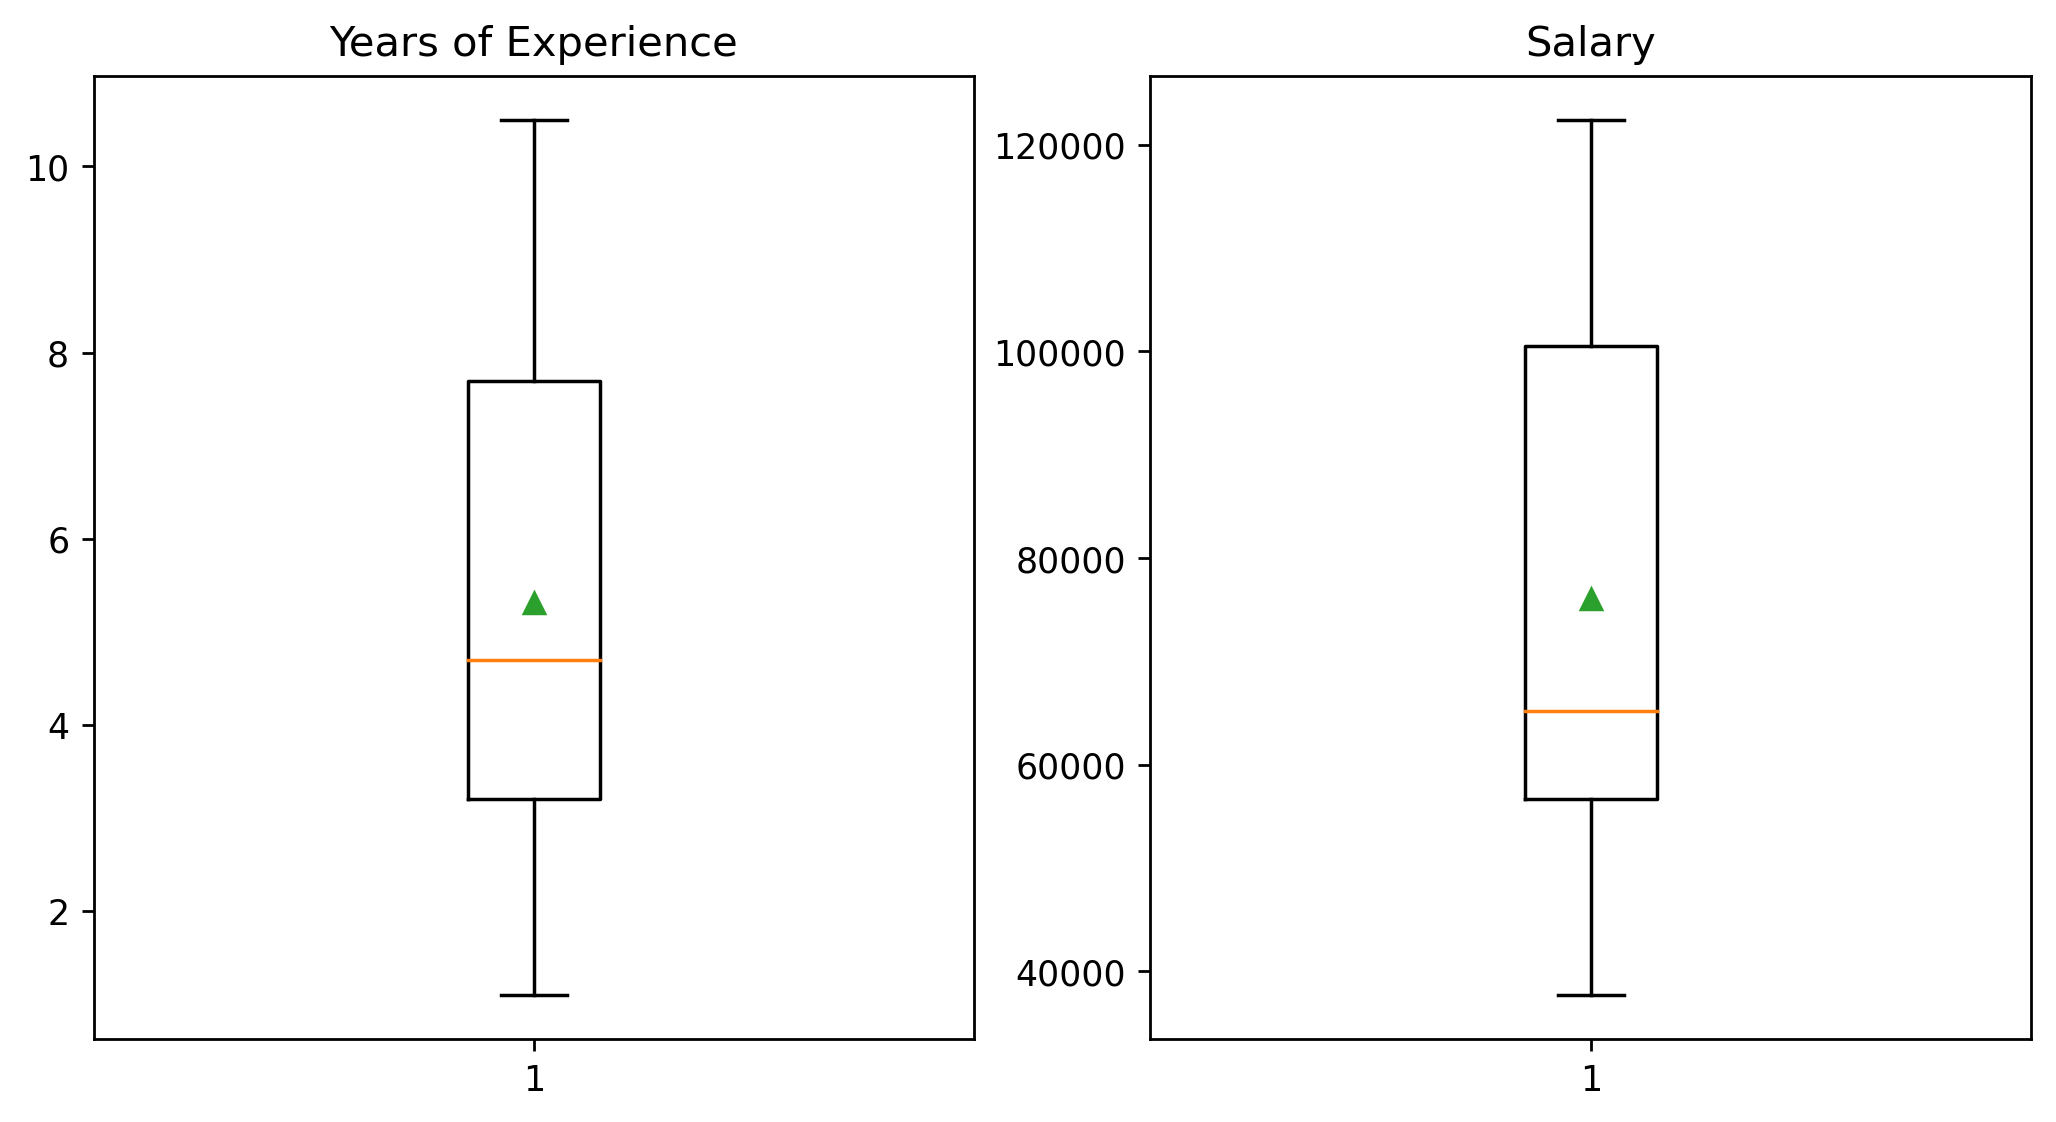

In [35]:
plt.subplot(1,2,1)
plt.boxplot(df_Sal['YearsExperience'], showmeans= True)
plt.title('Years of Experience')

plt.subplot(1,2,2)
plt.boxplot(df_Sal['Salary'], showmeans= True)
plt.title('Salary')

> #### No outliers seen in Boxplot Visualization.

* <font color = 'blue'><b><U> CORRELATION ANALYSIS </U></b>


<AxesSubplot:>

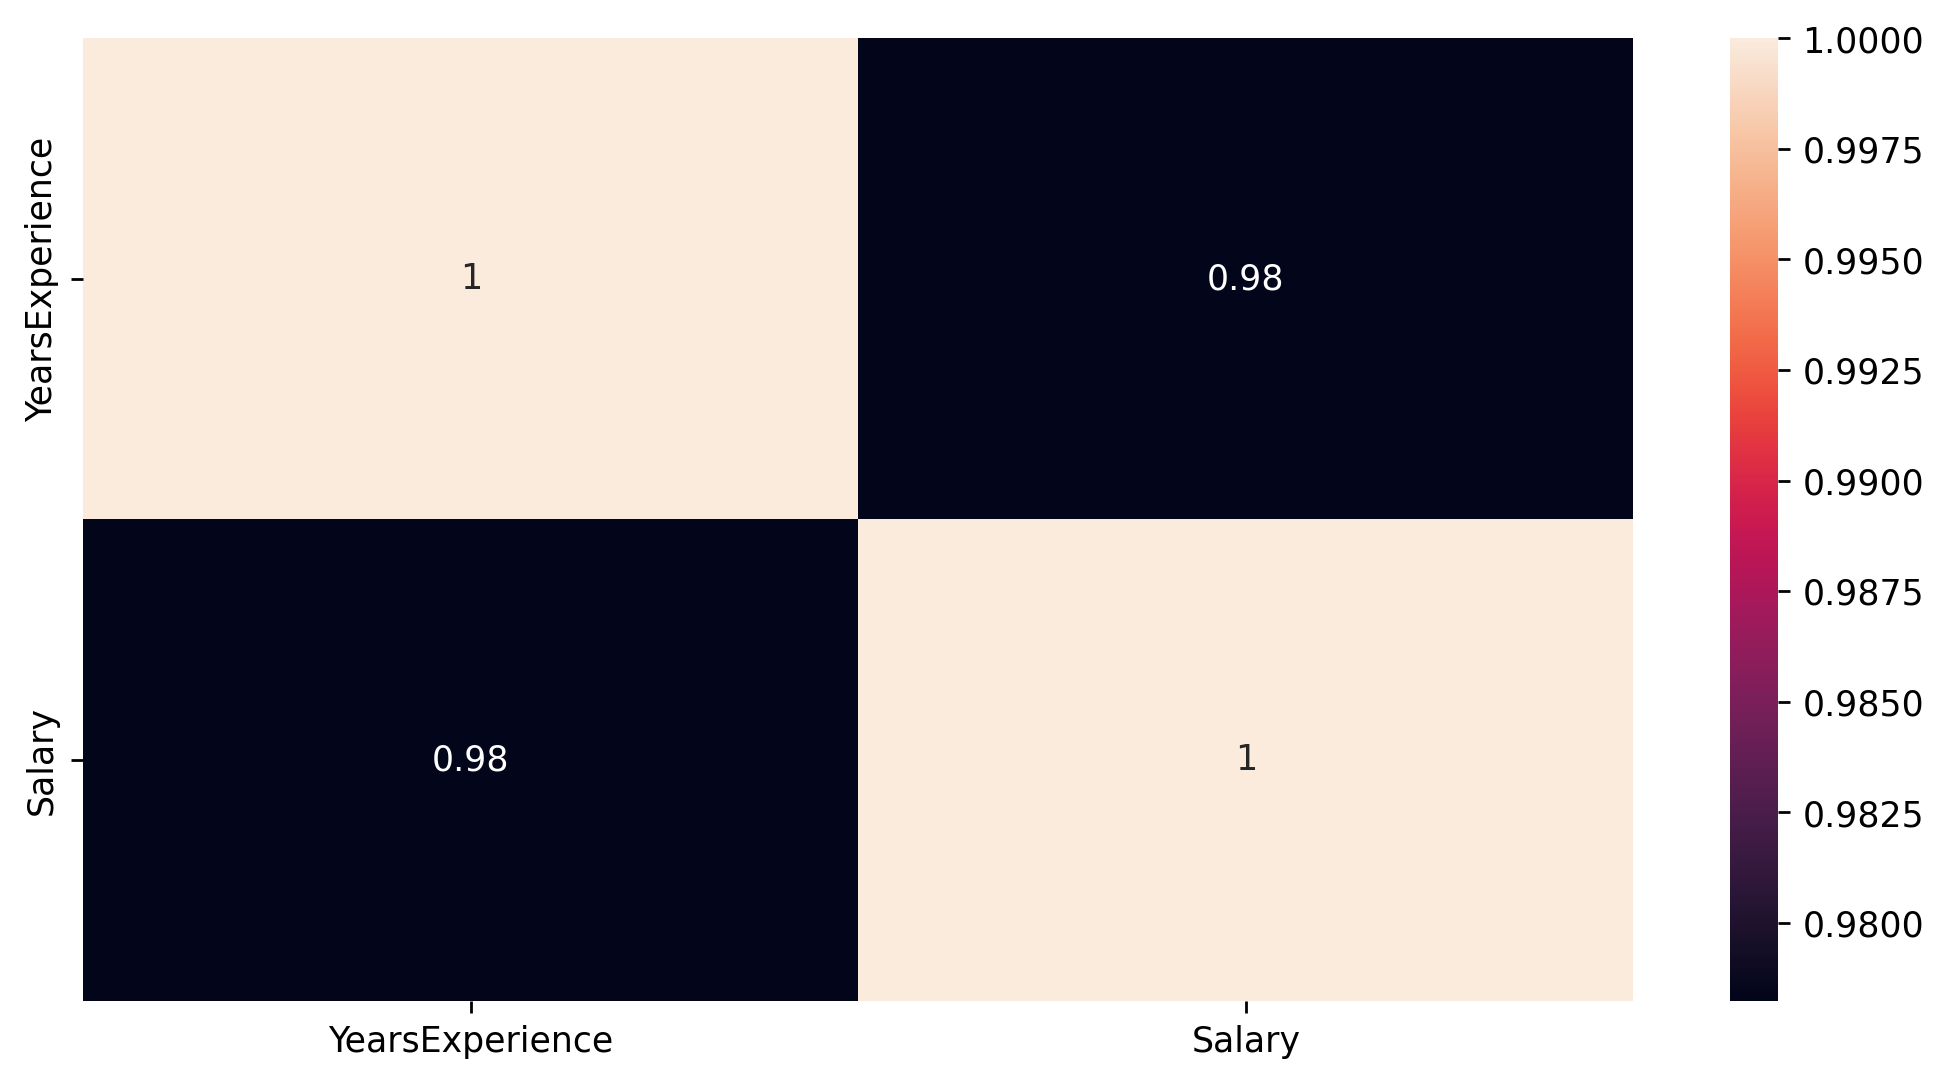

In [36]:
sns.heatmap(df_Sal.corr(), annot=True)

> #### Here we can see correlation = 0.98 shows that YearsExperience and Salary Variables are highly correlated 

* <font color = 'blue'><b><u> MODEL BUILDING </U></b>


In [37]:
model_Sal = smf.ols('Salary~YearsExperience', data = df_Sal).fit()

In [38]:
model_Sal.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

> #### We got Intercept value(C)=25792 and slope value(m)=9449 for best fit line y = mx + c

* <font color = 'blue'><b><u> MODEL VALIDATION </U></b>


In [39]:
#  rsquared value 
model_Sal.rsquared

0.9569566641435086

> #### We got very good accuracy i.e. 95% still let's see how much accuracy will increased after log transformation

* <font color = 'blue'><u><b> MODEL WITH LOG TRANSFORMATION </b></U>

#### Fitting Linear Regression Model 

In [40]:
model_Sal_log = smf.ols('np.log(Salary)~np.log(YearsExperience)', data=df_Sal).fit()

In [41]:
model_Sal_log.rsquared

0.9052150725817149

> #### We get 90% accuracy with log transformation, which is reduced by 5%. So, we consider model without any transformation.

* <font color = 'blue'><u><b> PREDICTING DELIVERY TIME WITHOUT ANY TRANSFORMATION </b></U>

In [42]:
new_Sal = pd.DataFrame({
    'YearsExperience' : [2,6,8,9,10,11,14,16,18,20]
})

In [43]:
new_Sal['PredictedSal']= model_Sal.predict(new_Sal)
new_Sal

,YearsExperience,PredictedSal
0,2,44692.124842
1,6,82491.974127
2,8,101391.898770
3,9,110841.861092
4,10,120291.823413
5,11,129741.785735
6,14,158091.672699
7,16,176991.597342
8,18,195891.521985
9,20,214791.446628


> #### Here we can see Predicted values of Salary are increasing with respect to Increasing Years of Experience.

<AxesSubplot:xlabel='YearsExperience', ylabel='PredictedSal'>

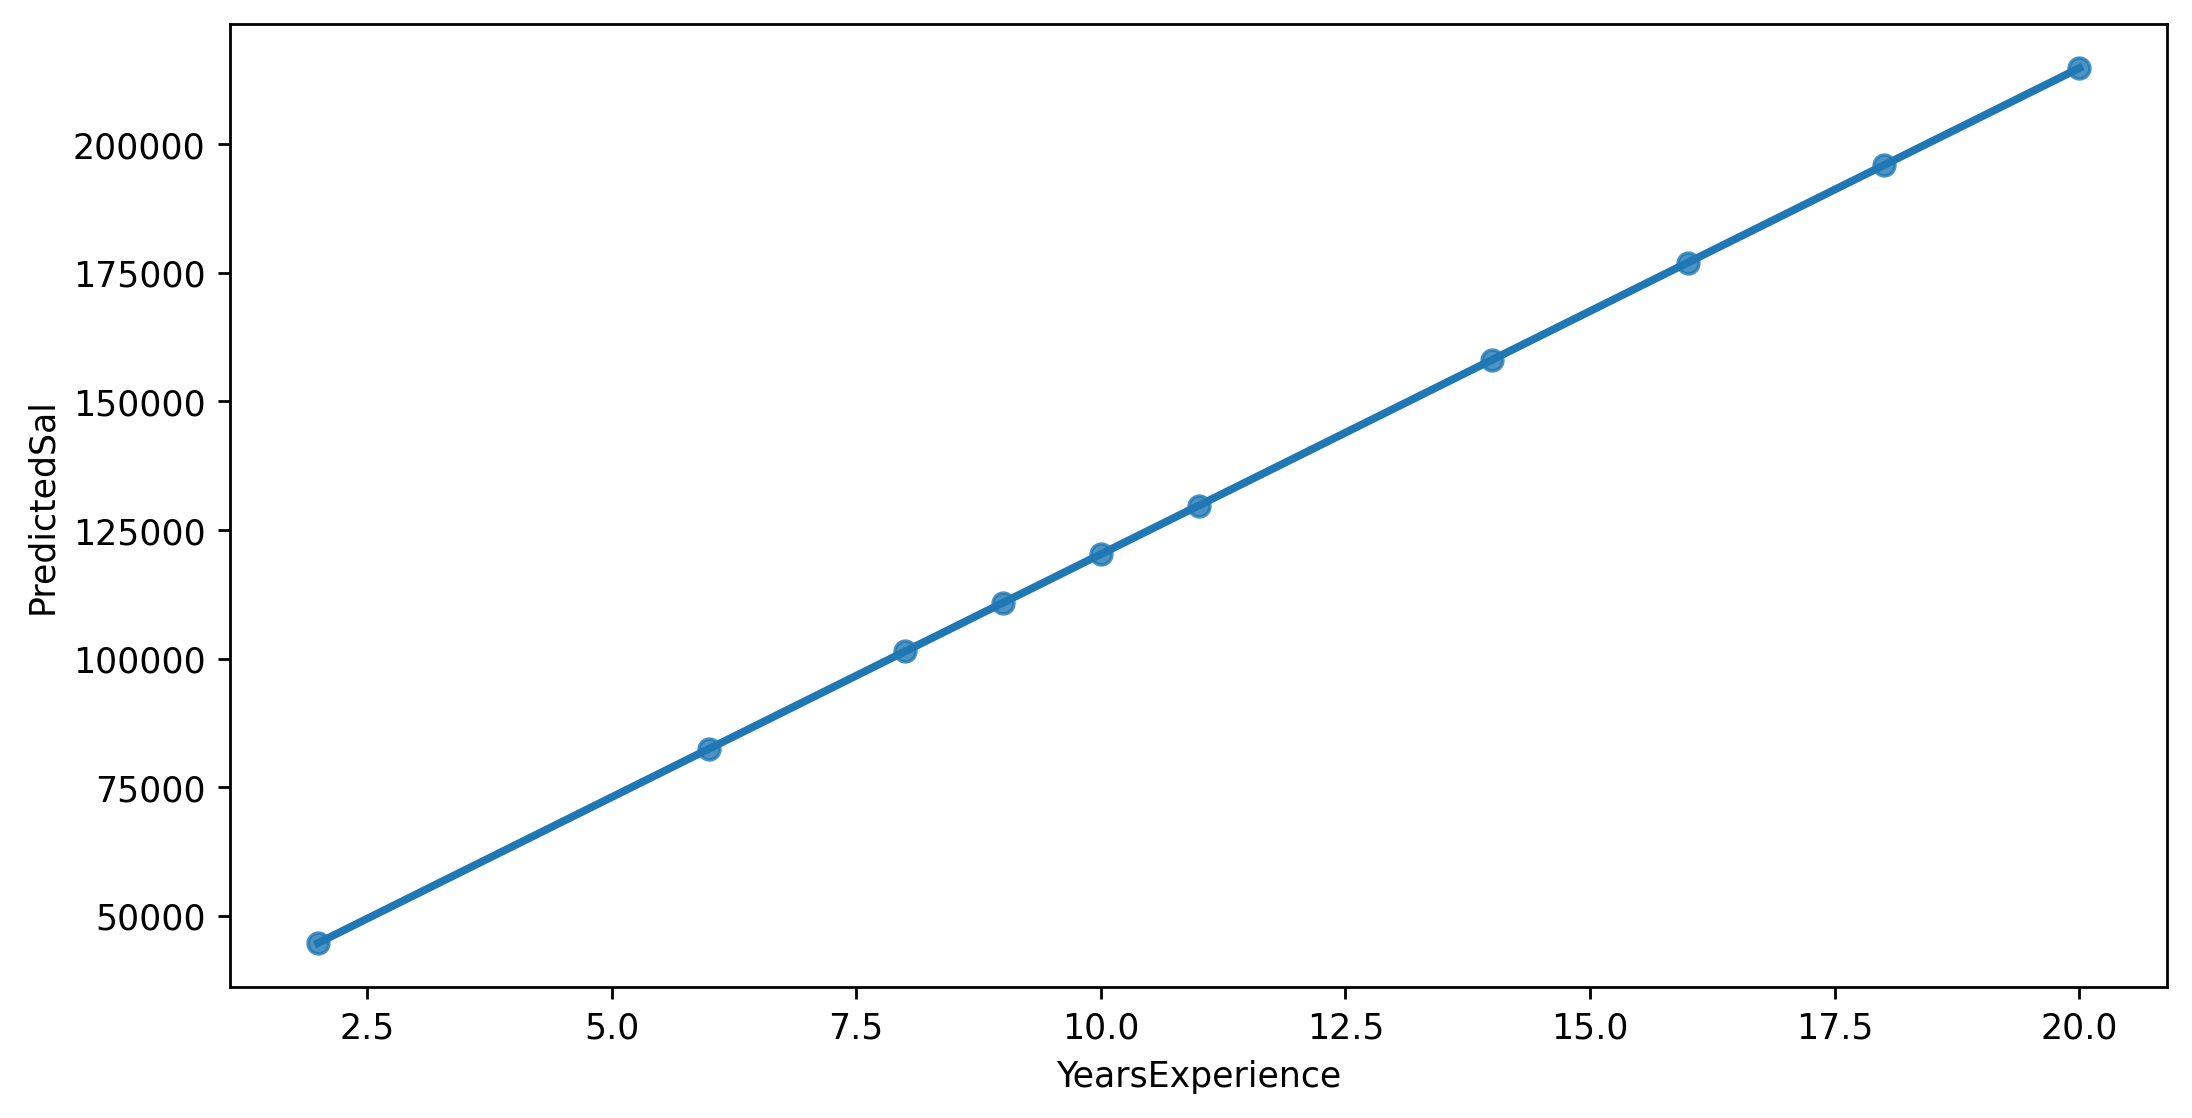

In [44]:
sns.regplot('YearsExperience', 'PredictedSal', data=new_Sal)

<br>

<br><br><br>

> ## END
___